In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy
from scipy.stats import kurtosis
from scipy.stats import binom
import thinkstats2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler



In [25]:
df = pd.read_csv('Concrete strength prediction.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [26]:
df['Cement (lb in yard^3)'] = df['Cement (component 1)(kg in a m^3 mixture)'] * 1.308
df['Blast Furnace Slag (lb in a cubic yard mixture)'] = df['Blast Furnace Slag (component 2)(kg in a m^3 mixture)'] * 1.308
df['Fly Ash (lb in a cubic yard mixture)'] = df['Fly Ash (component 3)(kg in a m^3 mixture)'] * 1.308
df['Water (lb in a cubic yard mixture)'] = df['Water  (component 4)(kg in a m^3 mixture)'] * 1.308
df['Superplasticizer (lb in a cubic yard mixture)'] = df['Superplasticizer (component 5)(kg in a m^3 mixture)']* 1.308
df['Coarse Aggregate (lb in a cubic yard mixture)'] = df['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'] * 1.308
df['Fine Aggregate (lb in a cubic yard mixture)'] = df['Fine Aggregate (component 7)(kg in a m^3 mixture)'] * 1.308
df['Concrete compressive strength (psig)'] = df['Concrete compressive strength(MPa, megapascals) '] * 145
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)",Cement (lb in yard^3),Blast Furnace Slag (lb in a cubic yard mixture),Fly Ash (lb in a cubic yard mixture),Water (lb in a cubic yard mixture),Superplasticizer (lb in a cubic yard mixture),Coarse Aggregate (lb in a cubic yard mixture),Fine Aggregate (lb in a cubic yard mixture),Concrete compressive strength (psig)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,706.3200,0.0000,0.0,211.896,3.27,1360.3200,884.208,11598.55
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,706.3200,0.0000,0.0,211.896,3.27,1379.9400,884.208,8974.05
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,434.9100,186.3900,0.0,298.224,0.00,1219.0560,776.952,5839.15
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,434.9100,186.3900,0.0,298.224,0.00,1219.0560,776.952,5952.25
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,259.7688,173.1792,0.0,251.136,0.00,1279.7472,1079.754,6423.50


In [27]:
dropped_cols = df.drop(['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 'Fly Ash (component 3)(kg in a m^3 mixture)',
                'Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
                'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Concrete compressive strength(MPa, megapascals) '], axis=1)

In [28]:
df = df.drop(['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 'Fly Ash (component 3)(kg in a m^3 mixture)',
                'Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
                'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Concrete compressive strength(MPa, megapascals) '], axis=1)

In [29]:
df.head()

,Age (day),Cement (lb in yard^3),Blast Furnace Slag (lb in a cubic yard mixture),Fly Ash (lb in a cubic yard mixture),Water (lb in a cubic yard mixture),Superplasticizer (lb in a cubic yard mixture),Coarse Aggregate (lb in a cubic yard mixture),Fine Aggregate (lb in a cubic yard mixture),Concrete compressive strength (psig)
0,28,706.3200,0.0000,0.0,211.896,3.27,1360.3200,884.208,11598.55
1,28,706.3200,0.0000,0.0,211.896,3.27,1379.9400,884.208,8974.05
2,270,434.9100,186.3900,0.0,298.224,0.00,1219.0560,776.952,5839.15
3,365,434.9100,186.3900,0.0,298.224,0.00,1219.0560,776.952,5952.25
4,360,259.7688,173.1792,0.0,251.136,0.00,1279.7472,1079.754,6423.50


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Age (day)                                        1030 non-null   int64  
 1   Cement (lb in yard^3)                            1030 non-null   float64
 2   Blast Furnace Slag (lb in a cubic yard mixture)  1030 non-null   float64
 3   Fly Ash (lb in a cubic yard mixture)             1030 non-null   float64
 4   Water (lb in a cubic yard mixture)               1030 non-null   float64
 5   Superplasticizer (lb in a cubic yard mixture)    1030 non-null   float64
 6   Coarse Aggregate (lb in a cubic yard mixture)    1030 non-null   float64
 7   Fine Aggregate (lb in a cubic yard mixture)      1030 non-null   float64
 8   Concrete compressive strength (psig)             1030 non-null   float64
dtypes: float64(8), int64(1)
memory 

In [31]:
df.shape

(1030, 9)

In [32]:
def createhistograms(data):
    numerical_columns = data.select_dtypes(include=['number']).columns
    if len(numerical_columns) == 0:
        print("Error: No numerical columns found in the DataFrame.")
        return

    data[numerical_columns].hist(figsize=(15, 12), bins=20, layout=(len(numerical_columns)//2+1, 2))
    plt.suptitle('Histograms of Numerical Columns')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

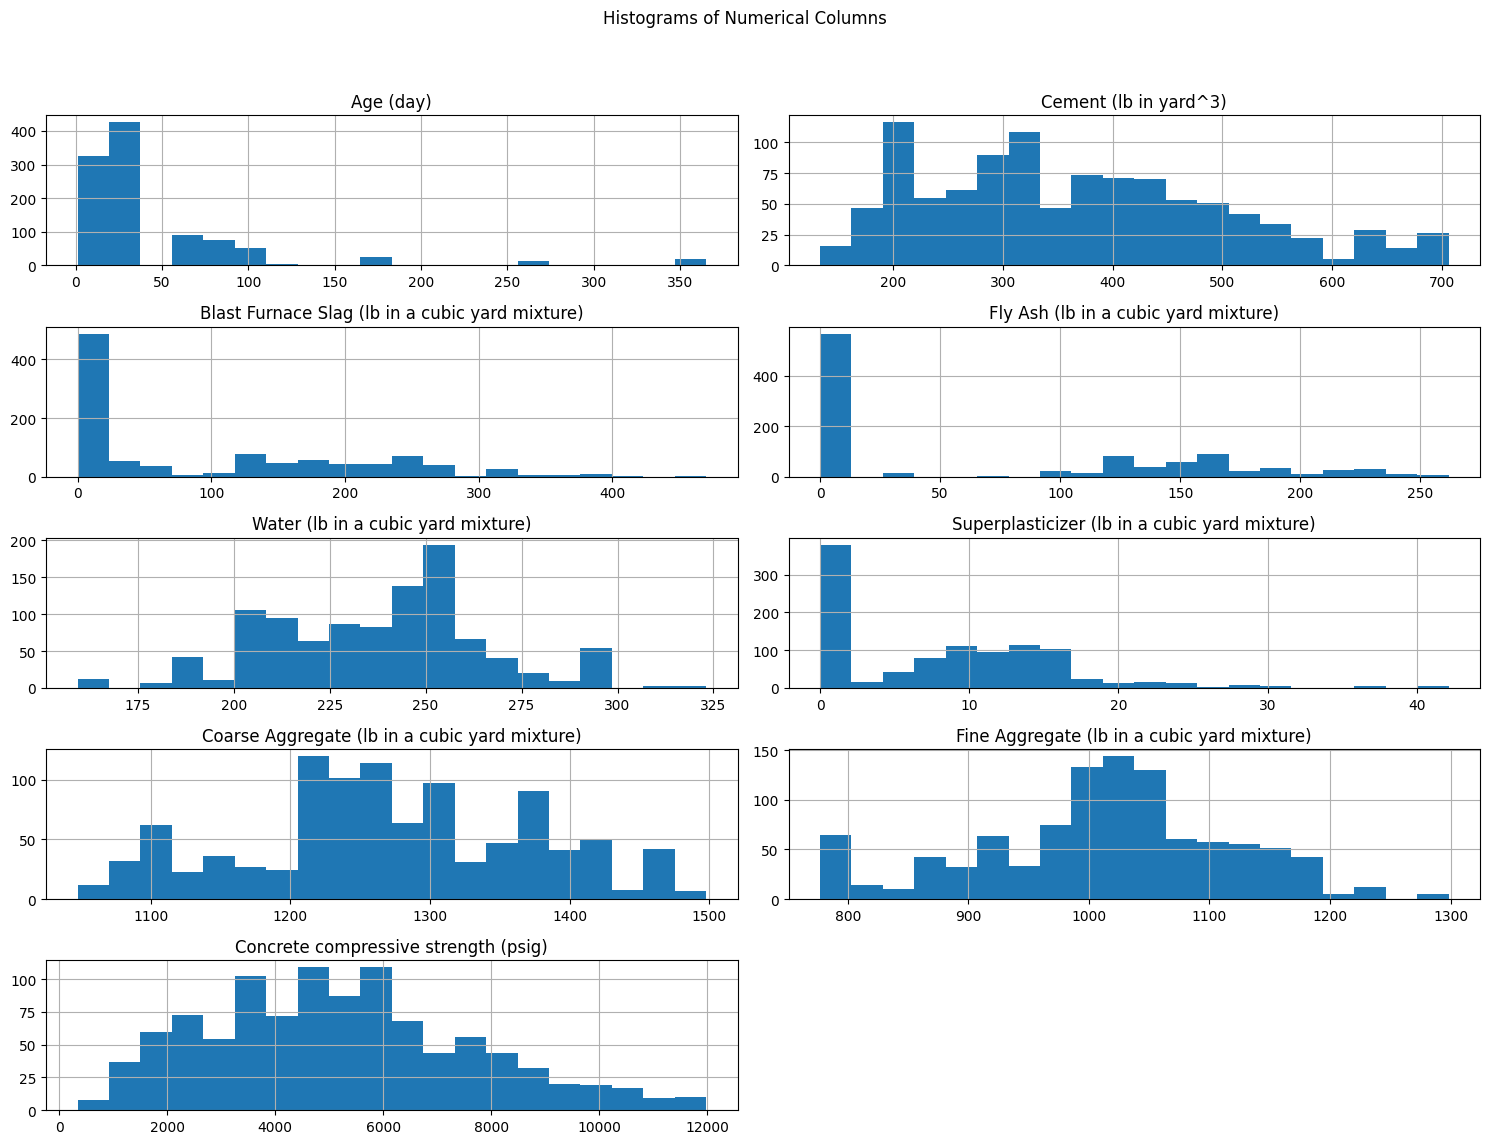

In [33]:
createhistograms(df)

<Axes: >

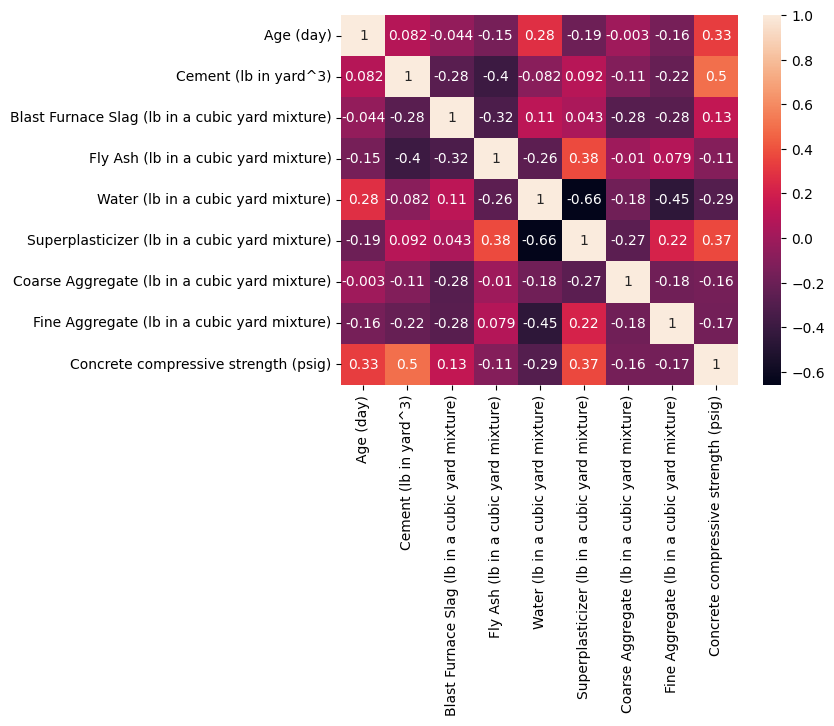

In [34]:
sns.heatmap(df.corr(), annot= True)

C:\Users\T_Lin\AppData\Local\Temp\ipykernel_28396\3364786654.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


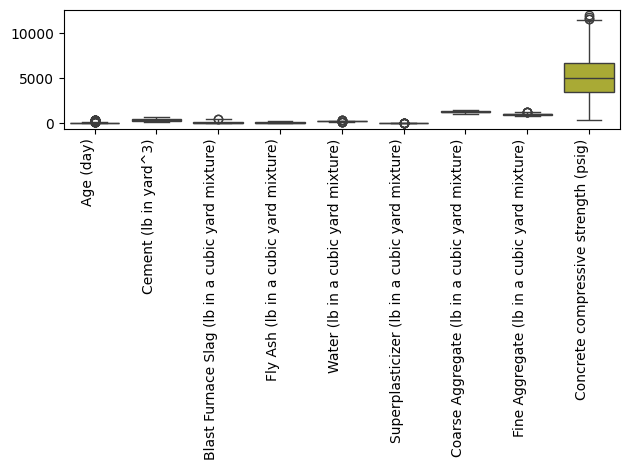

In [35]:
#plt.figure(figsize= (10,10))
sns.boxplot(df)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.tight_layout()

In [36]:
for column in df.columns:
    median_value = df[column].median()
    print(f"Column: {column}, Median: {median_value}")
print()
for column in df.columns:
    mean_value = df[column].mean()
    print(f"Column: {column}, Mean: {mean_value}")
print()
for column in df.columns:
    mode_value = stats.mode(df[column])
    print(f"Column: {column}, Mode: {mode_value}")
    print()
print(df.var())


Column: Age (day), Median: 28.0
Column: Cement (lb in yard^3), Median: 356.95320000000004
Column: Blast Furnace Slag (lb in a cubic yard mixture), Median: 28.776
Column: Fly Ash (lb in a cubic yard mixture), Median: 0.0
Column: Water (lb in a cubic yard mixture), Median: 241.98000000000002
Column: Superplasticizer (lb in a cubic yard mixture), Median: 8.3712
Column: Coarse Aggregate (lb in a cubic yard mixture), Median: 1266.144
Column: Fine Aggregate (lb in a cubic yard mixture), Median: 1019.586
Column: Concrete compressive strength (psig), Median: 4994.525

Column: Age (day), Mean: 45.662135922330094
Column: Cement (lb in yard^3), Mean: 367.76756621359226
Column: Blast Furnace Slag (lb in a cubic yard mixture), Mean: 96.65573941747573
Column: Fly Ash (lb in a cubic yard mixture), Mean: 70.87836116504855
Column: Water (lb in a cubic yard mixture), Mean: 237.49000427184464
Column: Superplasticizer (lb in a cubic yard mixture), Mean: 8.115695533980583
Column: Coarse Aggregate (lb in a 

In [37]:
for column in df.columns:
    kurtosis_value = kurtosis(df[column])
    print(f"Column: {column}, kurtosis: {kurtosis_value}")


Column: Age (day), kurtosis: 12.104176861479678
Column: Cement (lb in yard^3), kurtosis: -0.5239478718269006
Column: Blast Furnace Slag (lb in a cubic yard mixture), kurtosis: -0.511531550962133
Column: Fly Ash (lb in a cubic yard mixture), kurtosis: -1.3281245631223988
Column: Water (lb in a cubic yard mixture), kurtosis: 0.1156702572366699
Column: Superplasticizer (lb in a cubic yard mixture), kurtosis: 1.398607857846006
Column: Coarse Aggregate (lb in a cubic yard mixture), kurtosis: -0.6019318003595227
Column: Fine Aggregate (lb in a cubic yard mixture), kurtosis: -0.10750125086155249
Column: Concrete compressive strength (psig), kurtosis: -0.3180235854365785


In [38]:
strength_with_Fly= []
strength_without_Fly= []
for i in df['Fly Ash (lb in a cubic yard mixture)'].values:
    for j in df['Fly Ash (lb in a cubic yard mixture)'].values:
        if j > 0:
            strength_with_Fly.append(i)
        elif j < 1:
            strength_without_Fly.append(i)  
strength_with_pmf = thinkstats2.Pmf(strength_with_Fly)
strength_without_pmf = thinkstats2.Pmf(strength_without_Fly)
strength_without_pmf

Pmf({np.float64(0.0): 0.5495145631067961, np.float64(126.48360000000001): 0.0048543689320388345, np.float64(123.7368): 0.0048543689320388345, np.float64(131.454): 0.009708737864077669, np.float64(164.0232): 0.0048543689320388345, np.float64(159.0528): 0.009708737864077669, np.float64(154.7364): 0.019417475728155338, np.float64(163.76160000000002): 0.009708737864077669, np.float64(213.59640000000002): 0.0048543689320388345, np.float64(214.2504): 0.0048543689320388345, np.float64(32.046): 0.014563106796116504, np.float64(154.6056): 0.0048543689320388345, np.float64(123.08279999999999): 0.0048543689320388345, np.float64(125.1756): 0.009708737864077669, np.float64(131.3232): 0.010679611650485437, np.float64(163.2384): 0.0048543689320388345, np.float64(218.436): 0.009708737864077669, np.float64(159.576): 0.005825242718446602, np.float64(162.58440000000002): 0.0048543689320388345, np.float64(125.82960000000001): 0.0048543689320388345, np.float64(127.39920000000001): 0.0048543689320388345, np

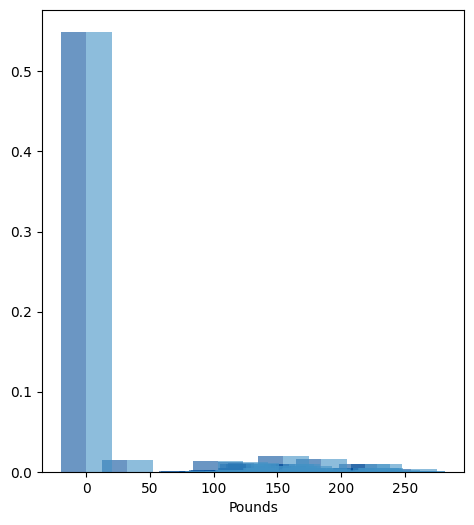

In [39]:
import thinkplot


thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(strength_with_pmf, align= 'right', width=20)
thinkplot.Hist(strength_without_pmf, align= 'left', width=20)
thinkplot.Config(xlabel = 'Pounds',
                 ylable='probility',
                 LEGEND= True)


In [40]:
fly_ash_cdf = thinkstats2.Cdf(df['Fly Ash (lb in a cubic yard mixture)'], label= 'Fly Ash')
fly_ash_cdf

Cdf([  0.      32.046   77.172   78.48    92.868   93.522   98.8848  99.408
 100.716  102.024  102.4164 102.5472 103.332  106.9944 107.256  112.488
 112.6188 113.142  113.796  114.45   116.412  116.8044 117.1968 117.72
 118.1124 119.028  119.9436 120.336  122.8212 122.952  123.0828 123.7368
 124.26   125.0448 125.1756 125.8296 126.4836 126.876  127.3992 128.184
 129.2304 130.2768 130.6692 130.8    131.3232 131.454  134.724  135.1164
 138.648  138.9096 139.5636 139.8252 139.956  140.61   142.0488 142.572
 145.188  145.4496 146.3652 146.496  146.8884 147.2808 147.804  148.0656
 151.2048 151.728  153.69   154.6056 154.7364 155.1288 155.652  156.6984
 156.96   158.7912 159.0528 159.4452 159.576  160.884  161.9304 162.3228
 162.5844 163.2384 163.6308 163.7616 164.0232 164.5464 164.808  165.462
 167.0316 167.2932 167.424  168.2088 169.6476 170.04   172.656  172.7868
 173.4408 173.964  174.7488 175.272  177.888  178.6728 179.196  180.3732
 180.504  181.4196 181.812  184.428  185.2128 185.736 

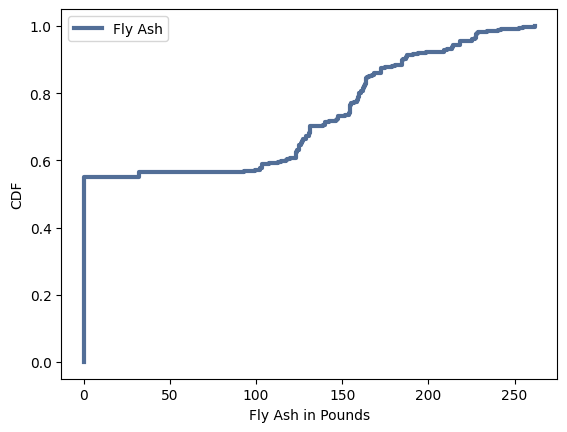

<Figure size 800x600 with 0 Axes>

In [41]:
thinkplot.Cdf(fly_ash_cdf)
thinkplot.Show(xlabel= 'Fly Ash in Pounds', ylabel= 'CDF')

<Axes: xlabel='Cement (lb in yard^3)', ylabel='Concrete compressive strength (psig)'>

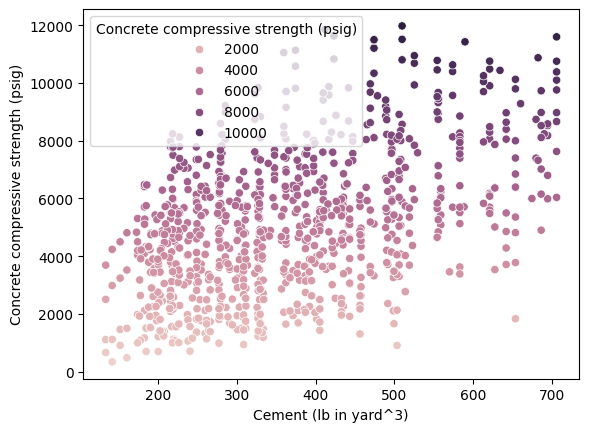

In [50]:
sns.scatterplot(x= 'Cement (lb in yard^3)', y= 'Concrete compressive strength (psig)',  hue= 'Concrete compressive strength (psig)', data= df)


<Axes: xlabel='Water (lb in a cubic yard mixture)', ylabel='Concrete compressive strength (psig)'>

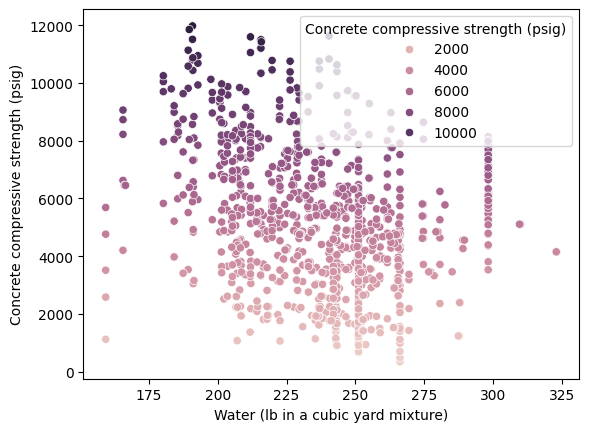

In [51]:
sns.scatterplot(x= 'Water (lb in a cubic yard mixture)', y= 'Concrete compressive strength (psig)',  hue= 'Concrete compressive strength (psig)', data= df)

In [70]:

class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat
    
    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [71]:
data= df['Concrete compressive strength (psig)'].values, df['Water (lb in a cubic yard mixture)'].values 
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

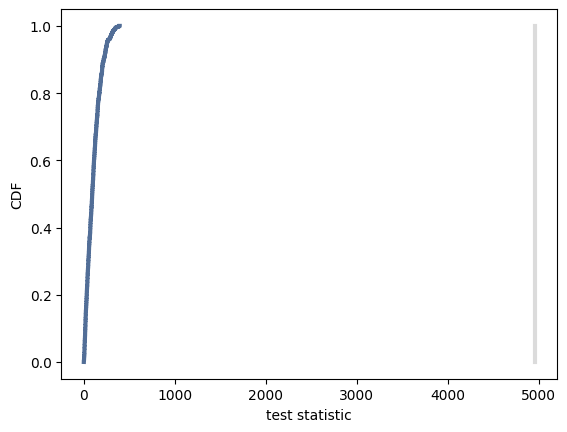

<Figure size 800x600 with 0 Axes>

In [65]:
ht.PlotCdf()
thinkplot.Show(xlabel = 'test statistic', ylabel= 'CDF')

In [85]:
data = np.array(df[['Age (day)', 'Cement (lb in yard^3)', 'Blast Furnace Slag (lb in a cubic yard mixture)', 'Water (lb in a cubic yard mixture)']])
dependant = np.array(df[['Concrete compressive strength (psig)']])

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
dependant_data = scaler.fit_transform(dependant)


In [86]:
X = data
y = dependant_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [87]:
model = LinearRegression()


In [88]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [89]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.10411923620394103
Mean Squared Error: 0.017024596218209696
Root Mean Squared Error: 0.13047833620264207
